# `Class 1: Knowing the Data`

### 1.1 Conhecendo nossos dados e o Pandas


In [1]:
# importando pandas
import pandas as pd

In [2]:
# carregando arquivo
url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv'

data = pd.read_csv(url, sep=',')
data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
# verificando formato do DataFrama
data.shape


(100836, 4)

In [4]:
# verificando nomes das colunas
data.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
# primeiras 10 linhas
data.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### 1.2 Primeiras visualizações 

<Axes: ylabel='Frequency'>

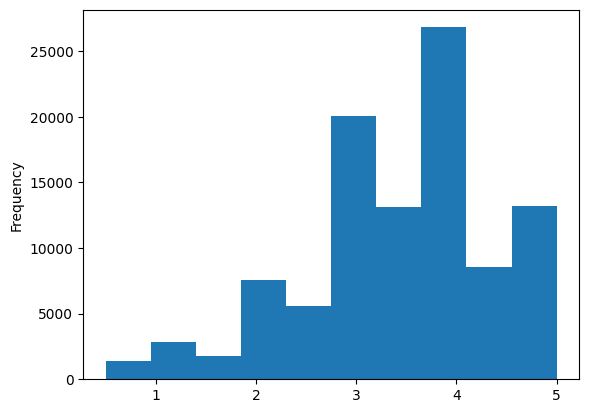

In [6]:
# plotando algumas informações
data['rating'].plot(kind='hist')

In [7]:
# calculando média de uma coluna
media = data["rating"].mean()

# calculando mediana de uma coluna
mediana = data["rating"].median()

print(media)
print(mediana)


3.501556983616962
3.5


In [8]:
# utilizando função `describe`
data["rating"].describe()


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [9]:
# importante seaborn
import seaborn as sns


<Axes: ylabel='rating'>

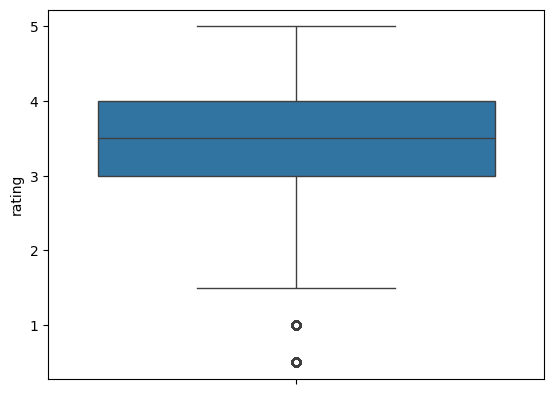

In [10]:
# plotando algo com boxplot
sns.boxplot(data["rating"]) 


# `Class 2: Analyzing the Data`

### 2.1 Explorando os Dados

In [12]:
# importando nova tabela com mais infos sobre os filmes
url2 = "https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv"

data2 = pd.read_csv(
    url2,
    sep=","
)
data2

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
# notas relacionadas ao filme de id == 1
data.query("movieId == 1")["rating"].mean()

np.float64(3.9209302325581397)

### 2.2 Distribuindo as Médias dos Filmes

# `Class 3: Understanding Variables Types`

# `Class 4: Viewing Data`

# `Class 5: Adjusting the Visuals`

# `Class 6: Data Statistics`